# <U>**TRABAJO FINAL - CODERHOUSE - AEROLINEA**</U>
## PABLO PEROTTI
### **_COMISION 60935_**

# **Encuesta de Satisfacción de Pasajeros Aéreos**

## *Abstract*

En el mundo empresarial, comprender y satisfacer las necesidades de los clientes es fundamental para el crecimiento y éxito de una compañía. Para profundizar en la relación entre los clientes y una aerolínea, es crucial realizar encuestas que revelen información relevante sobre sus preferencias y opiniones.

En los últimos años, se ha prestado una atención especial a la perspectiva de género, lo que permite una comprensión más completa de la vida de hombres y mujeres, así como de las relaciones entre ambos. Este enfoque desafía los estereotipos y fomenta la igualdad entre géneros en todos los aspectos de la vida.

Este trabajo se centra en una encuesta realizada a pasajeros de aerolíneas para evaluar su nivel de satisfacción con los servicios prestados. El conjunto de datos, obtenido de Kaggle, contiene más de 100,000 respuestas que proporcionan información valiosa sobre la experiencia de los pasajeros tanto dentro como fuera del avión.

## *Objetivo*

El objetivo principal de este estudio es identificar y abordar los problemas que puedan afectar la satisfacción de los pasajeros, con el fin de mejorar continuamente nuestros servicios.

## *Contexto Comercial*

El mercado aeronáutico de Estados Unidos es altamente competitivo y genera miles de millones de dólares anualmente. Para destacar en este mercado, es crucial ofrecer servicios innovadores y de alta calidad que satisfagan las necesidades de los usuarios.

Hemos recopilado encuestas realizadas a pasajeros para comprender mejor sus opiniones y percepciones sobre nuestros servicios.

## *Desafío Comercial*

Desde una perspectiva de género, buscamos entender la experiencia general de nuestros pasajeros mediante las siguientes preguntas:

1. ¿Cuál es el nivel de satisfacción de nuestros clientes con respecto a nuestros servicios?
   
2. ¿Cuál es el propósito de viaje de nuestros pasajeros?

3. ¿Cuál es la distribución de edades entre nuestros pasajeros? ¿Qué género tiene mayor representación?

4. ¿Hay preferencias de selección de asientos según el propósito del viaje?


# Imports y lecturas iniciales

In [57]:
#  Importo las librerias para Datos
import numpy as np
import pandas as pd

# Importo las librerias para Visualizacion
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [58]:
# Archivo de datos
df = pd.read_csv('https://raw.githubusercontent.com/PabloPerotti/DATASETS/main/aerolinea.csv')

#Se desea conocer una aproximación sobre la información contenida en el database
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [59]:
# Se desea conocer el tamaño de la base de datos
df.shape

(103904, 25)

# Descripción de los elementos de la tabla

| Campo  |   Descripción  |
|---|---|
| gender   |   Género del pasajero (Male or Female) |
| Customer type   |   El tipo de cliente al que se le hace la encuesta (Se refiere a si es o no pasajero frecuente)  |
| Age   |   Edad del pasajero  |
| Type of travel  |   Razon de la realizacion del viaje (negocios o vacaciones)  |
| Class   |   Tipo de clase de viaje eligida (el tipo de asiento ya se bussines, Economica o Eco plus) |
| Flight distance   |   La distancia del vuelo que se realiza  |
| Inflight wifi service   |   Nivel de satisfaccion del servicio de wifi abordo (de ser 0 significa que no aplica o que el vuelo no poseia este servicio)  |
| Departure/Arrival time convenient  |   Nivel de satisfaccion del horario de salida/llegada  |
| Ease of Online booking   |    Nivel de satisfaccion de la compra online |
| Gate location   |    Nivel de satisfaccion de la ubicacion de puerta de embarque  |
| Food and drink   |    Nivel de satisfaccion de la comida y la bebida ofrecida  |
| Online boarding  |    Nivel de satisfaccion del checkin online  |
| Seat comfort   |    Nivel de satisfaccion de la comodidad del asiento elegido |
| Inflight entertainment   |    Nivel de satisfaccion del entretenimiento abordo  |
| On-board service   |    Nivel de satisfaccion del servicio abordo  |
| Leg room service  |   Nivel de satisfaccion del espacio para las piernas en el asiento  |
| Baggage handling  |   Nivel de satisfaccion del manejo de valijas  |
| Checkin service  |   Nivel de satisfaccion del servicio de checkin  |
| inflight_service  |   Nivel de satisfaccion del servicio en vuelo  |
| Cleanliness  |   Nivel de satisfaccion de la limpieza  |
| Departure delay in minutes  |   minutos de retraso de salida  |
| Arrival delay in minutes  |   minutos de retraso de llegada  |
| satisfaction  |   Nivel de satisfaccion general (satisfecho, neutral o insatisfecho)  |

# **Limpieza de los datos**

Para un mejor entendimiento de la información contenida dentro de ciertos campos lo que se hará es cambiar los nombres de inglés al castellano. Tambien dentro de éste apartado se cambiaran los elementos que vienen como nulos a 0 dentro del campo retraso_llegada.

In [60]:
# Busco el nombre de todas las columnas del database
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [61]:
# Busco la informacion de la base de datos averiguando el tipo de datos de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Puedes notar lo siguiente:

- La columna correspondiente a la columna Arrival Delay in Minutes tiene 310 valores faltantes.
- Las dos primeras columnas son inútiles y no afectarán a la clasificación, así que elimino las columnas.
- Muchas columnas contienen valores categóricos pero son del tipo 'object' o 'int64'. Vamos a reemplazar este tipo con uno especial diseñado para almacenar valores categóricos.'

In [62]:
# Elimino la columna que no tienen datos que me sirvan
df = df.drop(['Unnamed: 0', 'id'], axis=1)


In [63]:
# Convierto un conjunto específico de columnas en un DataFrame en tipo de datos categóricos
category_indexes = [0,1,3,4] 
df[df.columns[category_indexes]] = df[df.columns[category_indexes]].astype('category')


In [64]:
# Corroboro que todo lo realizado este bien
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  int64   
 7   Departure/Arrival time convenient  103904 non-null  int64   
 8   Ease of Online booking             103904 non-null  int64   
 9   Gate location                      103904 non-null  int64   
 10  Food and drink                     103904 non-null  int64   
 11  Online boarding           

In [65]:
#
df.describe().round(2)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103594.00
mean,39.38,1189.45,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.30,3.64,3.29,14.82,15.18
std,15.11,997.15,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.23,38.70
min,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,40.00,843.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,51.00,1743.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


In [66]:
# Cuento los tipos de viaje 
df['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [67]:

df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

# **Insights**

## Analisis de la distribución según el género del pasajero

Se busca analizar la distribución general de pasajeros según el género, así como evaluar la preferencia por los tipos de asiento. Para ello, primero agruparemos a los pasajeros según la clase de asiento elegida y luego según el género. Esto nos permitirá comprender tanto la composición de género en cada clase de asiento como las preferencias de género dentro de cada categoría de asiento.

In [68]:
# Distribución general por género
distribucion_genero_general = df['Gender'].value_counts().reset_index()
distribucion_genero_general.columns = ['Gender', 'CANTIDAD']

# Distribución por clase de asiento y género
distribucion_genero_asiento = df.groupby(['Class', 'Gender']).size().reset_index(name='CANTIDAD')

In [69]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### Gráfico correspondiente a la distribución a nivel general

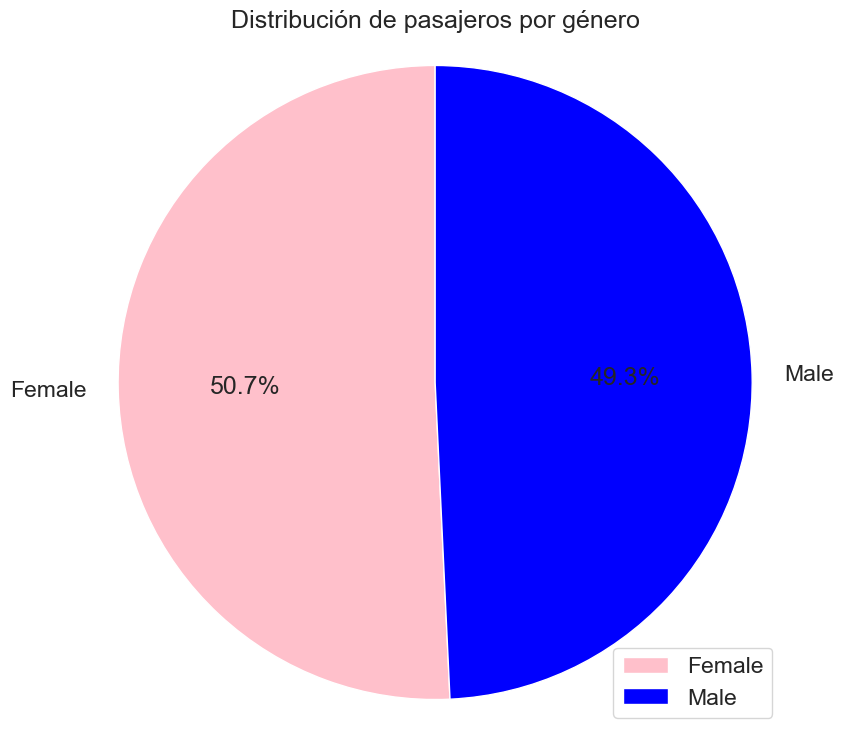

In [70]:
# Defino el esquema de colores personalizado
colores = {'Male': 'blue', 'Female': 'pink'}

# Gráfico de pastel que visualiza la distribucion de pasajeros por genero
figura_genero_general, ax = plt.subplots(figsize = (9, 9))
ax.pie(distribucion_genero_general['CANTIDAD'], labels=distribucion_genero_general['Gender'], autopct='%1.1f%%', startangle=90, colors=[colores[g] for g in distribucion_genero_general['Gender']])
ax.set_title('Distribución de pasajeros por género')
plt.axis('equal')  # Aseguro que el gráfico sea un círculo
plt.legend(loc='lower right')  # Muestro  la leyenda 
plt.show()



### Gráfico correspondiente a la distribución a nivel de clase de asientos

In [71]:
print(distribucion_genero_asiento.columns)


Index(['Class', 'Gender', 'CANTIDAD'], dtype='object')


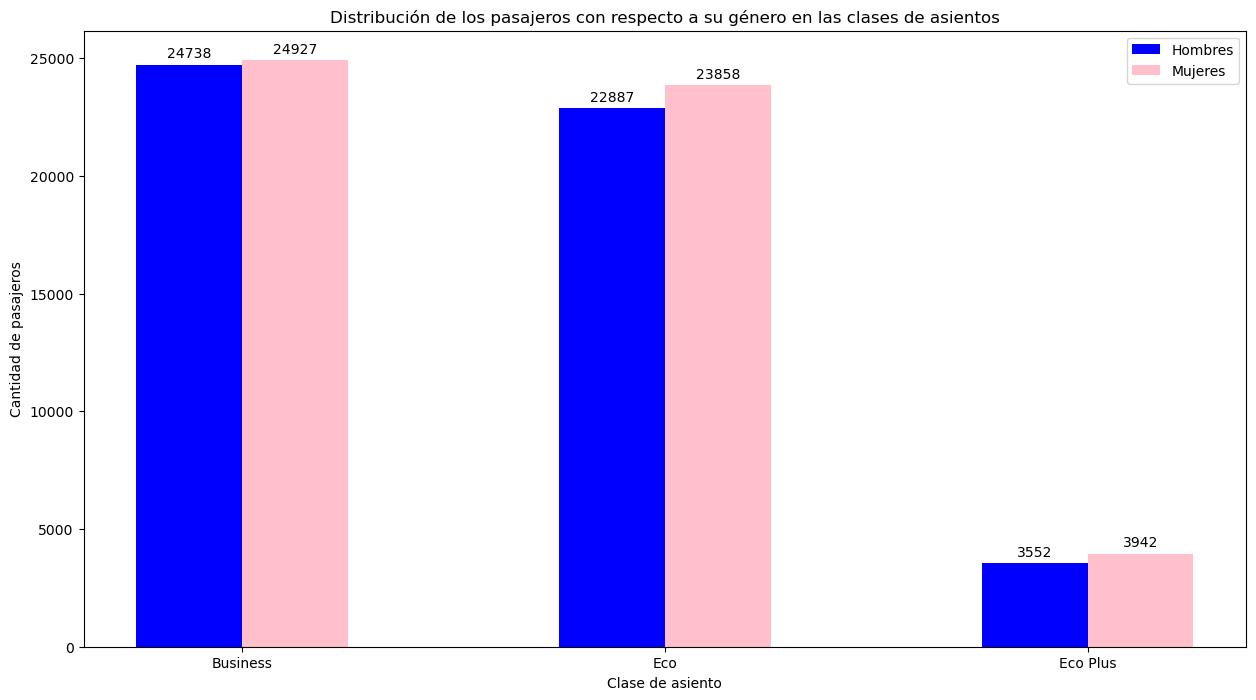

In [72]:
color_mapping = {'Male': 'blue', 'Female': 'pink'}

# Agrupo los datos por clase de asiento y género
grupo = distribucion_genero_asiento.groupby(['Class', 'Gender']).sum().unstack()

plt.style.use('default')

# Grafico de barras
plt.figure(figsize=(15, 8))

# Convierto el índice en una lista
indice_list = list(range(len(grupo)))

# Dibujo las barras para cada género
barra_hombres = plt.bar(indice_list, grupo['CANTIDAD']['Male'], width=0.25, label='Hombres', color=color_mapping['Male'])
barra_mujeres = plt.bar([x + 0.25 for x in indice_list], grupo['CANTIDAD']['Female'], width=0.25, label='Mujeres', color=color_mapping['Female'])

# Agrego titulo y labels
plt.xlabel('Clase de asiento')
plt.ylabel('Cantidad de pasajeros')
plt.title('Distribución de los pasajeros con respecto a su género en las clases de asientos')
plt.xticks([x + 0.25 / 2 for x in indice_list], grupo.index)
plt.legend()

# Agrego los totales a cada barra
for rect in barra_hombres.patches:
    plt.annotate(f'{rect.get_height():.0f}', xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

for rect in barra_mujeres.patches:
    plt.annotate(f'{rect.get_height():.0f}', xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()


### Análisis de los gráficos de distribución general en razon del género

De los gráficos surge que hubieron más pasajeros mujeres que hombres, tendencia que también se ve reflejada en la eleccion de los tipos de clase de asientos.


## Análisis de los tipos de cliente según el género


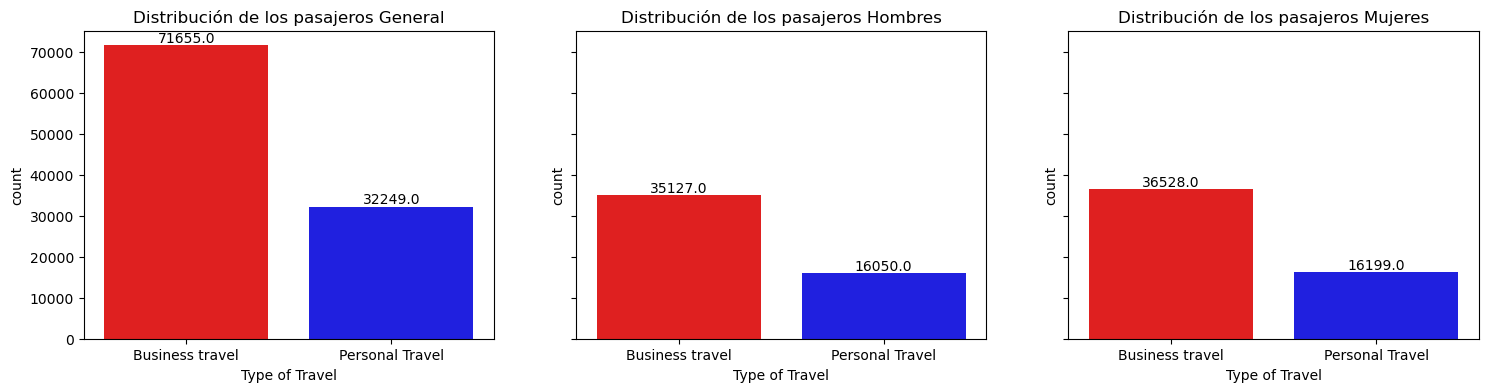

In [73]:
# Este código crea un gráfico de barras que muestra la distribución de pasajeros según el tipo de viaje (de negocios o personal) en 
# tres subplots horizontales. Cada subplot representa una categoría diferente de pasajeros: General, Hombres y Mujeres. 
# Utiliza diferentes colores para representar cada tipo de viaje y muestra el recuento de pasajeros en la parte superior de cada barra. 
# La distribución se basa en los datos proporcionados en el DataFrame df.

fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
colors = ['red', 'blue']
# Defino el orden de los tipos de viaje
order = ['Business travel', 'Personal Travel']

for i, (gen_pas, genero) in enumerate(zip([['Male','Female'], ['Male'], ['Female']], ['General', 'Hombres', 'Mujeres'])):
    df_gen_pas = df[df['Gender'].isin(gen_pas)]
    
    sns.countplot(data = df_gen_pas, x = 'Type of Travel', ax = axs[i], order = order, palette = colors)
    axs[i].set_title('Distribución de los pasajeros ' + genero)
    
    for bar in axs[i].patches:
        axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}', ha = 'center', va = 'bottom')

plt.show()

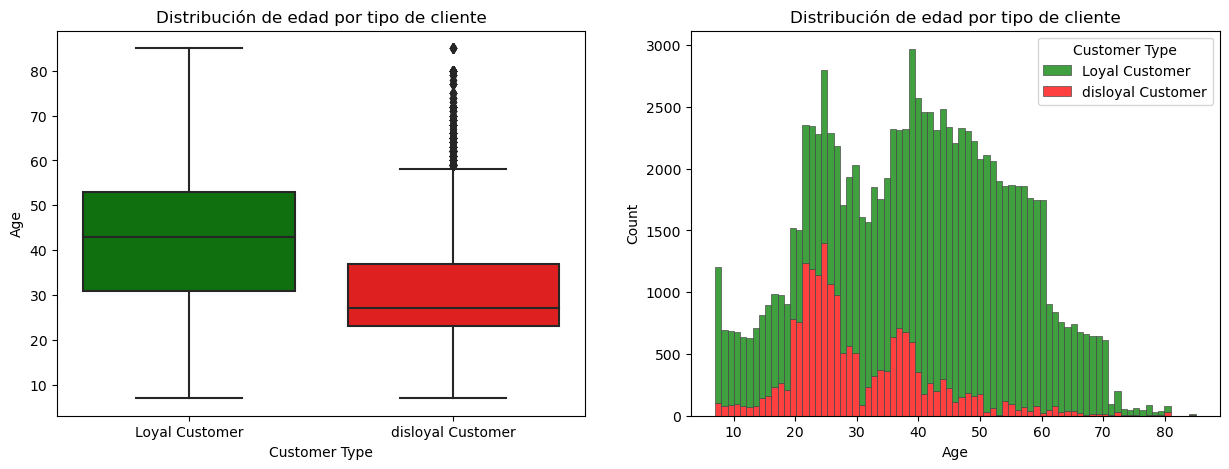

In [74]:
# Este código crea una figura con dos subplots lado a lado. El primer subplot muestra un gráfico de caja que representa la distribución 
# de la edad de los clientes, diferenciando entre clientes leales y clientes desleales. El segundo subplot muestra un histograma apilado 
# que también representa la distribución de la edad de los clientes, pero con las distribuciones de edad de los dos tipos de clientes 
# apiladas una encima de la otra para una comparación visual más directa. Ambos gráficos están basados en los datos proporcionados  
# en el DataFrame df.

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
colors = ('green', 'red')
order = ('Loyal Customer', 'disloyal Customer')

# Gráfico de caja
sns.boxplot(x='Customer Type', y='Age', palette=colors, data=df, ax=axs[0], order=order)
axs[0].set_title('Distribución de edad por tipo de cliente')

# Gráfico de histograma apilado
sns.histplot(df, x='Age', hue='Customer Type', multiple='stack', palette=colors, edgecolor='.3', linewidth=.5, ax=axs[1])
axs[1].set_title('Distribución de edad por tipo de cliente')

plt.show()

### Análisis de los gráficos

En los gráficos se muestra una marcada presencia de los pasajeros leales, que serían aquellos que se encuentran dentro de los programas de fidelidad de las aerolineas.

## Retraso de vuelos
Se necesita saber la distribución de los retrasos y el tiempo de retraso que se tuvo teniendo en cuenta la clase de asiento elegida

In [75]:
#Criterio por clase de asiento
distribucion_viaje_asiento = df.groupby(['Class', 'Type of Travel']).size().reset_index(name='CANTIDAD')
distribucion_viaje_asiento

,Class,Type of Travel,CANTIDAD
0,Business,Business travel,47508
1,Business,Personal Travel,2157
2,Eco,Business travel,20257
3,Eco,Personal Travel,26488
4,Eco Plus,Business travel,3890
5,Eco Plus,Personal Travel,3604


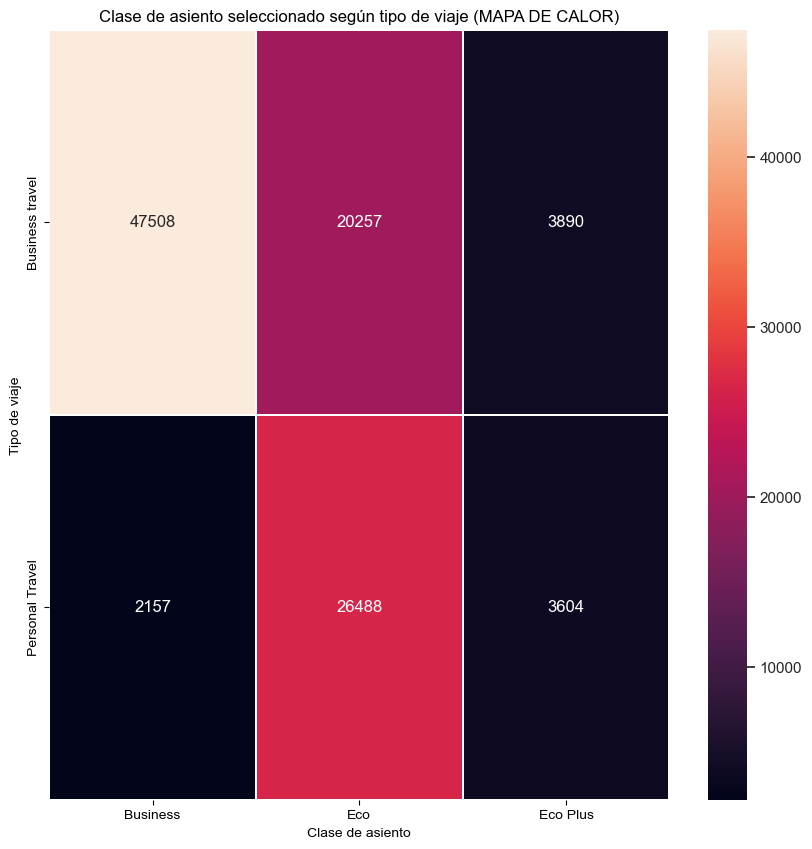

In [76]:
# Este código crea un mapa de calor que muestra la distribución de la cantidad de asientos seleccionados en diferentes clases de 
# asientos, según el tipo de viaje. Utiliza un DataFrame llamado distribucion_viaje_asiento y lo pivota para organizar los datos de 
# manera que las clases de asientos sean las columnas, los tipos de viaje sean las filas y los valores sean la cantidad de asientos 
# seleccionados. Luego, utilizo seaborn para trazar el mapa de calor con etiquetas mostrando los valores de cantidad en cada celda. 
# El mapa de calor está configurado con etiquetas en los ejes x e y y un título descriptivo.

asiento_vuelos = distribucion_viaje_asiento.pivot(index='Type of Travel', columns='Class', values='CANTIDAD')
f, ax = plt.subplots(figsize=(10, 10))

sns.set_theme(style='ticks', font_scale=1)
mapa_calor_codigo = sns.heatmap(asiento_vuelos, annot=True, fmt='.0f', linewidths=.2, ax=ax)
mapa_calor_codigo.set(xlabel='Clase de asiento', ylabel='Tipo de viaje', title='Clase de asiento seleccionado según tipo de viaje (MAPA DE CALOR)')

plt.show()


### Análisis del gráfico
Se observa una clara preferencia por los asientos de clase Business en los viajes de negocios, mientras que en los viajes de vacaciones se destaca una tendencia hacia la selección de los asientos de clase económica (Eco).

## Se desea conocer la distribución de los pasajeros según su edad y genero

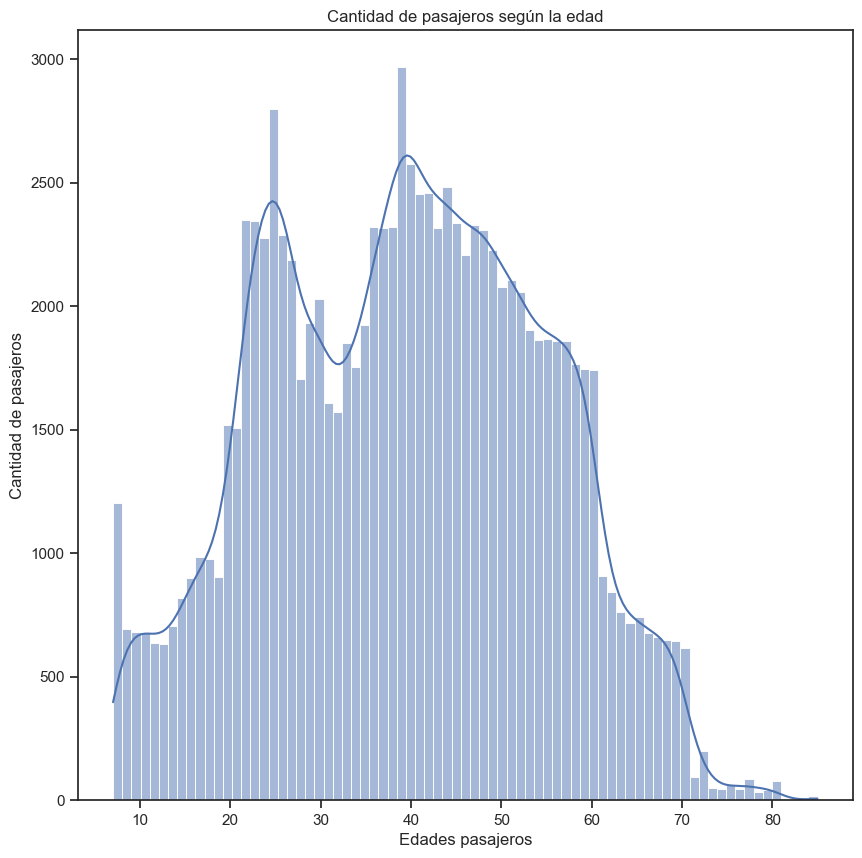

In [77]:
#Analisis de edad generalizado
f, ax = plt.subplots(figsize=(10, 10))

histograma_edad=sns.histplot(data=df, x='Age',kde=True)
histograma_edad.set(xlabel='Edades pasajeros',ylabel='Cantidad de pasajeros',title='Cantidad de pasajeros según la edad')

plt.show()

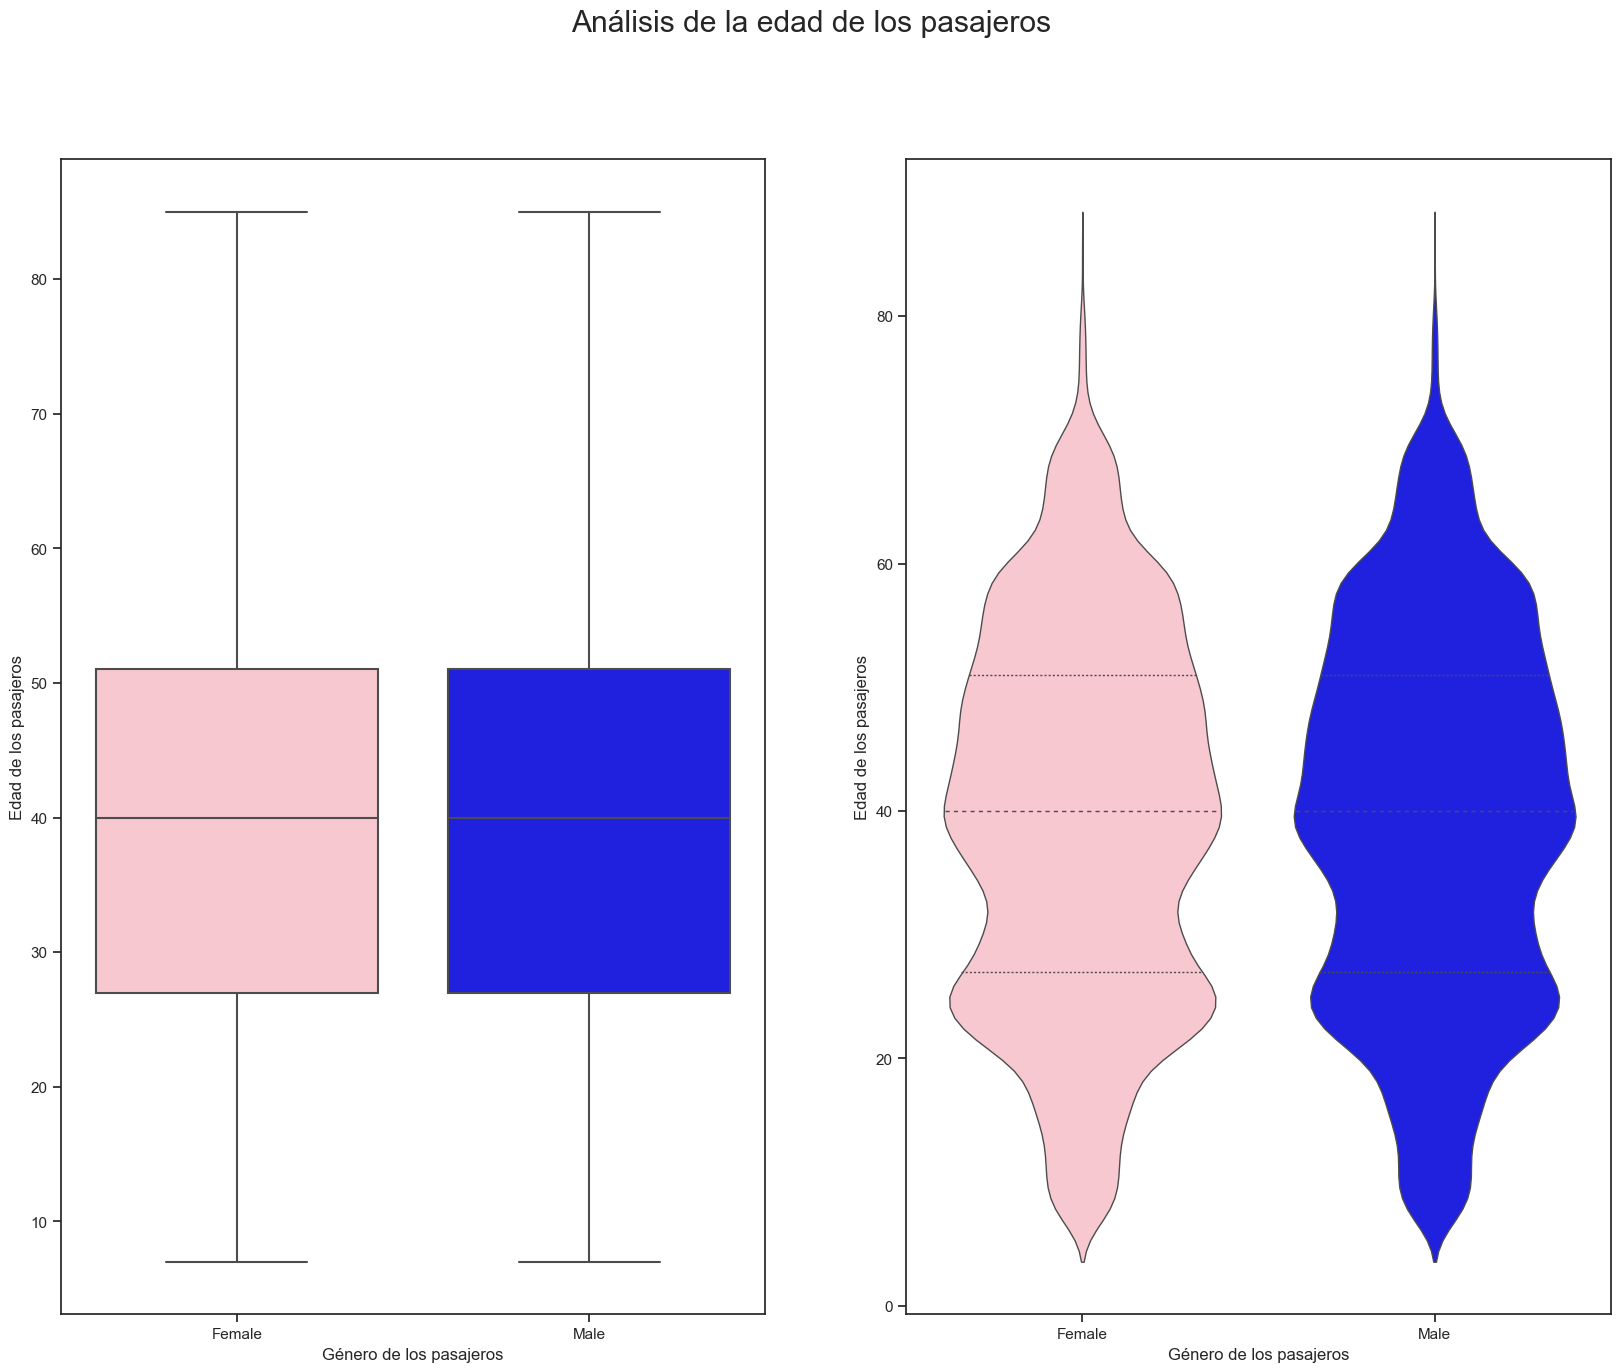

In [78]:
# Este código crea dos subplots en una figura: uno es un gráfico de caja y el otro es un gráfico de violín. Ambos gráficos muestran 
# la distribución de la edad de los pasajeros según su género.
color_mapping = {'Male': 'blue', 'Female': 'pink'}
fig_edad_pasajeros_gral, axes = plt.subplots(1, 2, figsize = (20,15))

sns.set_theme(style = 'ticks', font_scale = 1.5)

# En el gráfico de caja (izquierda), cada caja representa la distribución de la edad para un género específico, mostrando la mediana, 
# los cuartiles y los valores atípicos.
sns.boxplot(x = 'Gender', y = 'Age' , data = df,ax = axes[0], palette=color_mapping)
axes[0].set_ylabel('Edad de los pasajeros')
axes[0].set_xlabel('Género de los pasajeros')

# En el gráfico de violín (derecha), se superponen dos violines, uno para cada género. Cada violín representa la distribución de la 
# edad, con la forma del violín que indica la densidad de probabilidad en diferentes rangos de edad.
sns.violinplot(x = 'Gender', y = 'Age',data = df, split = True, inner = 'quart', linewidth = 1, ax = axes[1], palette=color_mapping)
axes[1].set_ylabel('Edad de los pasajeros')
axes[1].set_xlabel('Género de los pasajeros')

fig_edad_pasajeros_gral.suptitle('Análisis de la edad de los pasajeros')

plt.show()

### Análisis de los gráficos

**Análisis de Edades de Pasajeros:**

El conjunto de datos presenta un equilibrio notable entre los géneros. Para explorar las edades de los pasajeros, empleamos dos tipos de gráficos: un diagrama de caja (boxplot) a la izquierda y un gráfico de violín a la derecha.

- **Diagrama de Caja (Boxplot):** Para el sexo femenino, la distribución de edades muestra una mediana alrededor de los 40 años, con los cuartiles inferiores y superiores igualados por debajo y por encima de los 50 años, respectivamente. Este equilibrio sugiere una diversidad de edades entre las pasajeras.

- **Gráfico de Violín:** Complementando la información, el gráfico de violín revela que la mayoría de los pasajeros, tanto masculinos como femeninos, se encuentran en un rango de edades entre los 25 y los 60 años. Esta distribución uniforme señala una amplia representación de diferentes grupos etarios en el conjunto de datos.

Finalmente, el histograma general muestra una tendencia similar, sin distinguir entre géneros. Los picos de frecuencia ocurren aproximadamente a los 25 y 38 años, con una presencia mínima de pasajeros mayores de 70 años.

Este análisis resalta la diversidad de edades en la muestra de pasajeros, con una representación significativa en una amplia gama de grupos etarios.

Este análisis proporciona una descripción más clara y estructurada de las tendencias observadas en los gráficos, resaltando los hallazgos más relevantes y proporcionando una interpretación significativa de los resultados.


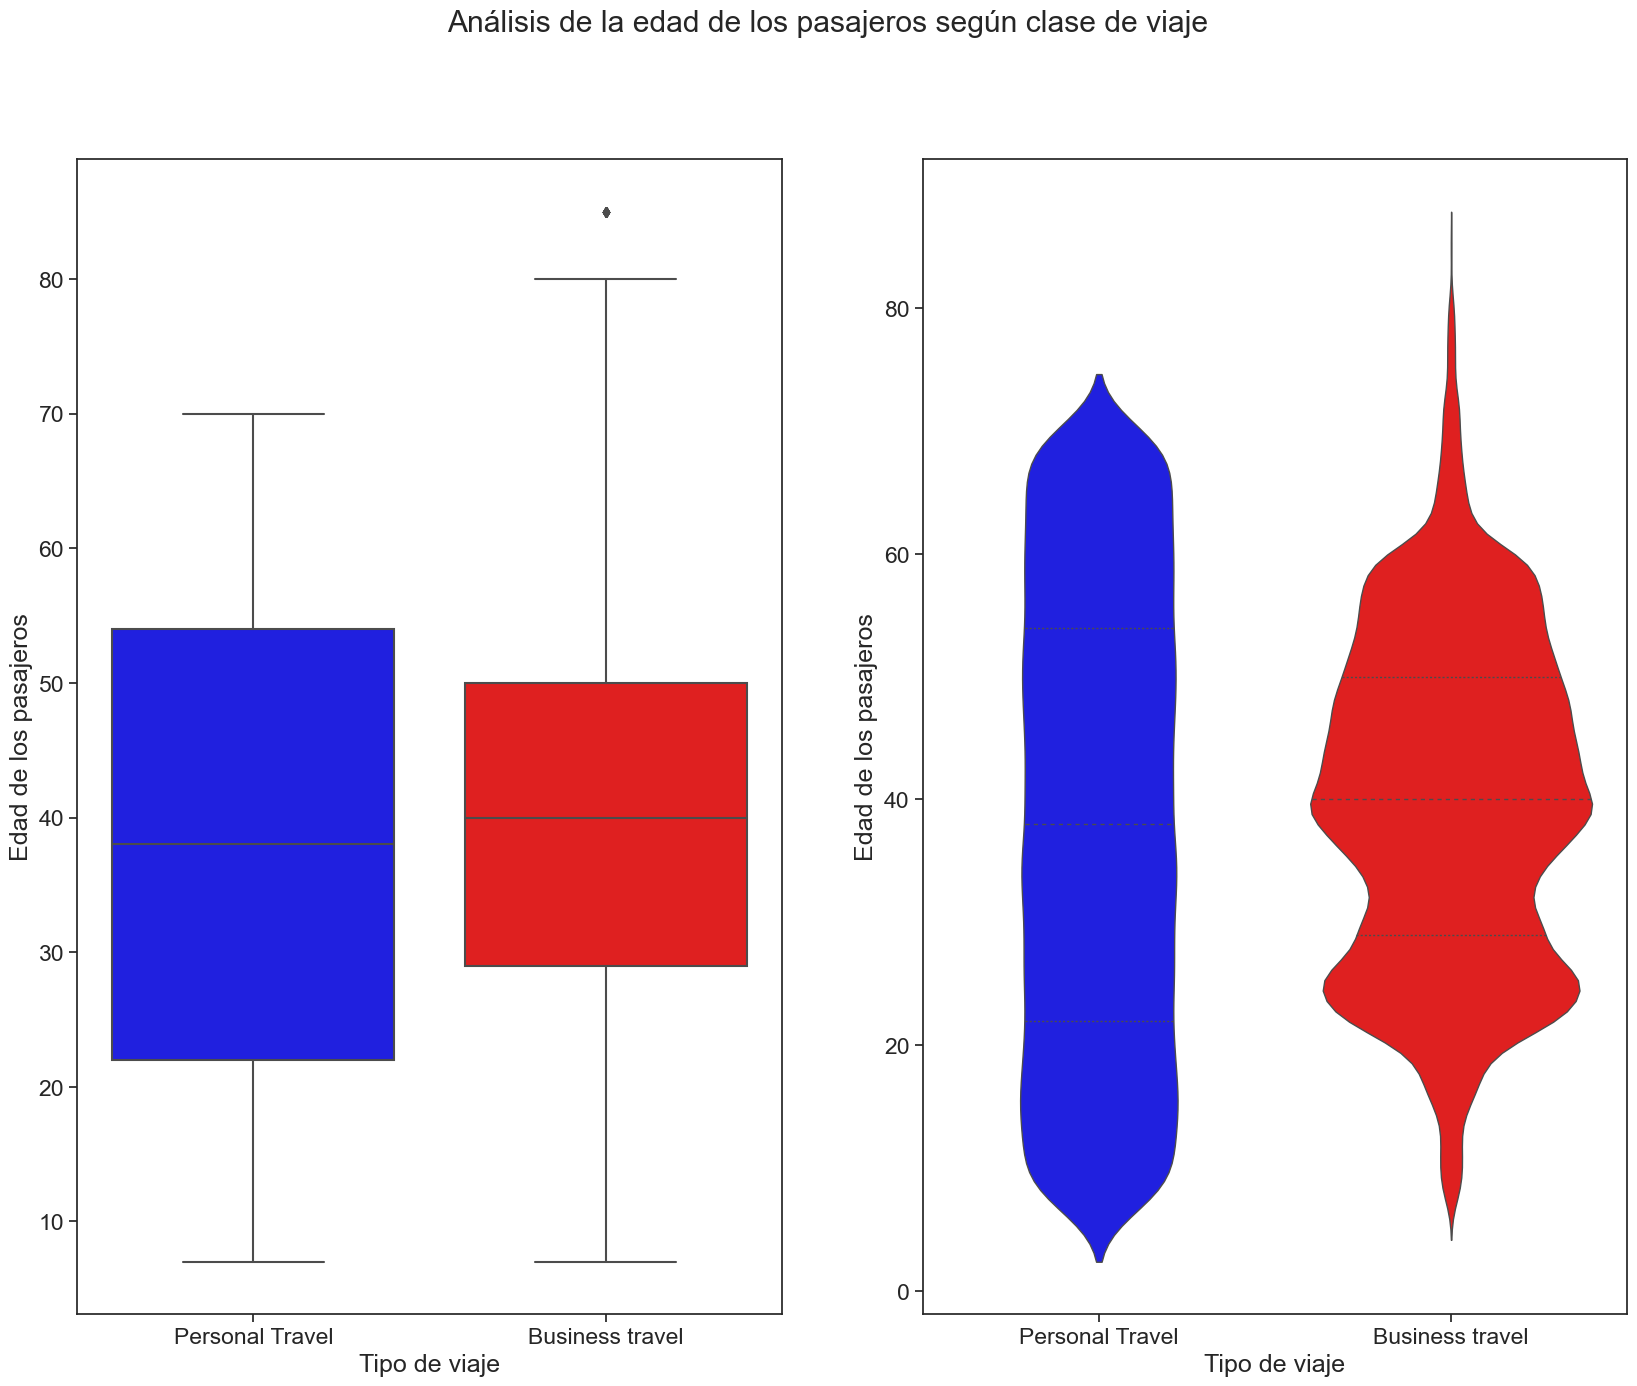

In [79]:
# El código crea dos gráficos: uno de caja y otro de violín. Ambos muestran la distribución de la edad de los pasajeros según el tipo 
# de viaje. En el gráfico de caja, cada caja representa la edad para cada tipo de viaje, y en el gráfico de violín, las formas de violín 
# representan la densidad de probabilidad de la edad. Se utilizan colores diferentes para cada tipo de viaje.

fig_edad_pasajeros_tipo_viaje, axes = plt.subplots(1, 2, figsize = (20,15))
order = ['Personal Travel', 'Business travel']
colors = ['blue', 'red']
sns.set_theme(style = 'ticks', font_scale = 1.5)

#Grafico de caja
sns.boxplot(x = 'Type of Travel', y = 'Age', data = df, ax = axes[0], palette = colors, order = order)
axes[0].set_ylabel('Edad de los pasajeros')
axes[0].set_xlabel('Tipo de viaje')

#Grafico de violin
sns.violinplot(x = 'Type of Travel', y = 'Age', data = df, split = True, inner = 'quart', linewidth = 1, ax = axes[1], palette = colors, order = order)
axes[1].set_ylabel('Edad de los pasajeros')
axes[1].set_xlabel('Tipo de viaje')

fig_edad_pasajeros_tipo_viaje.suptitle('Análisis de la edad de los pasajeros según clase de viaje')

plt.show()

## Nivel de satisfacción

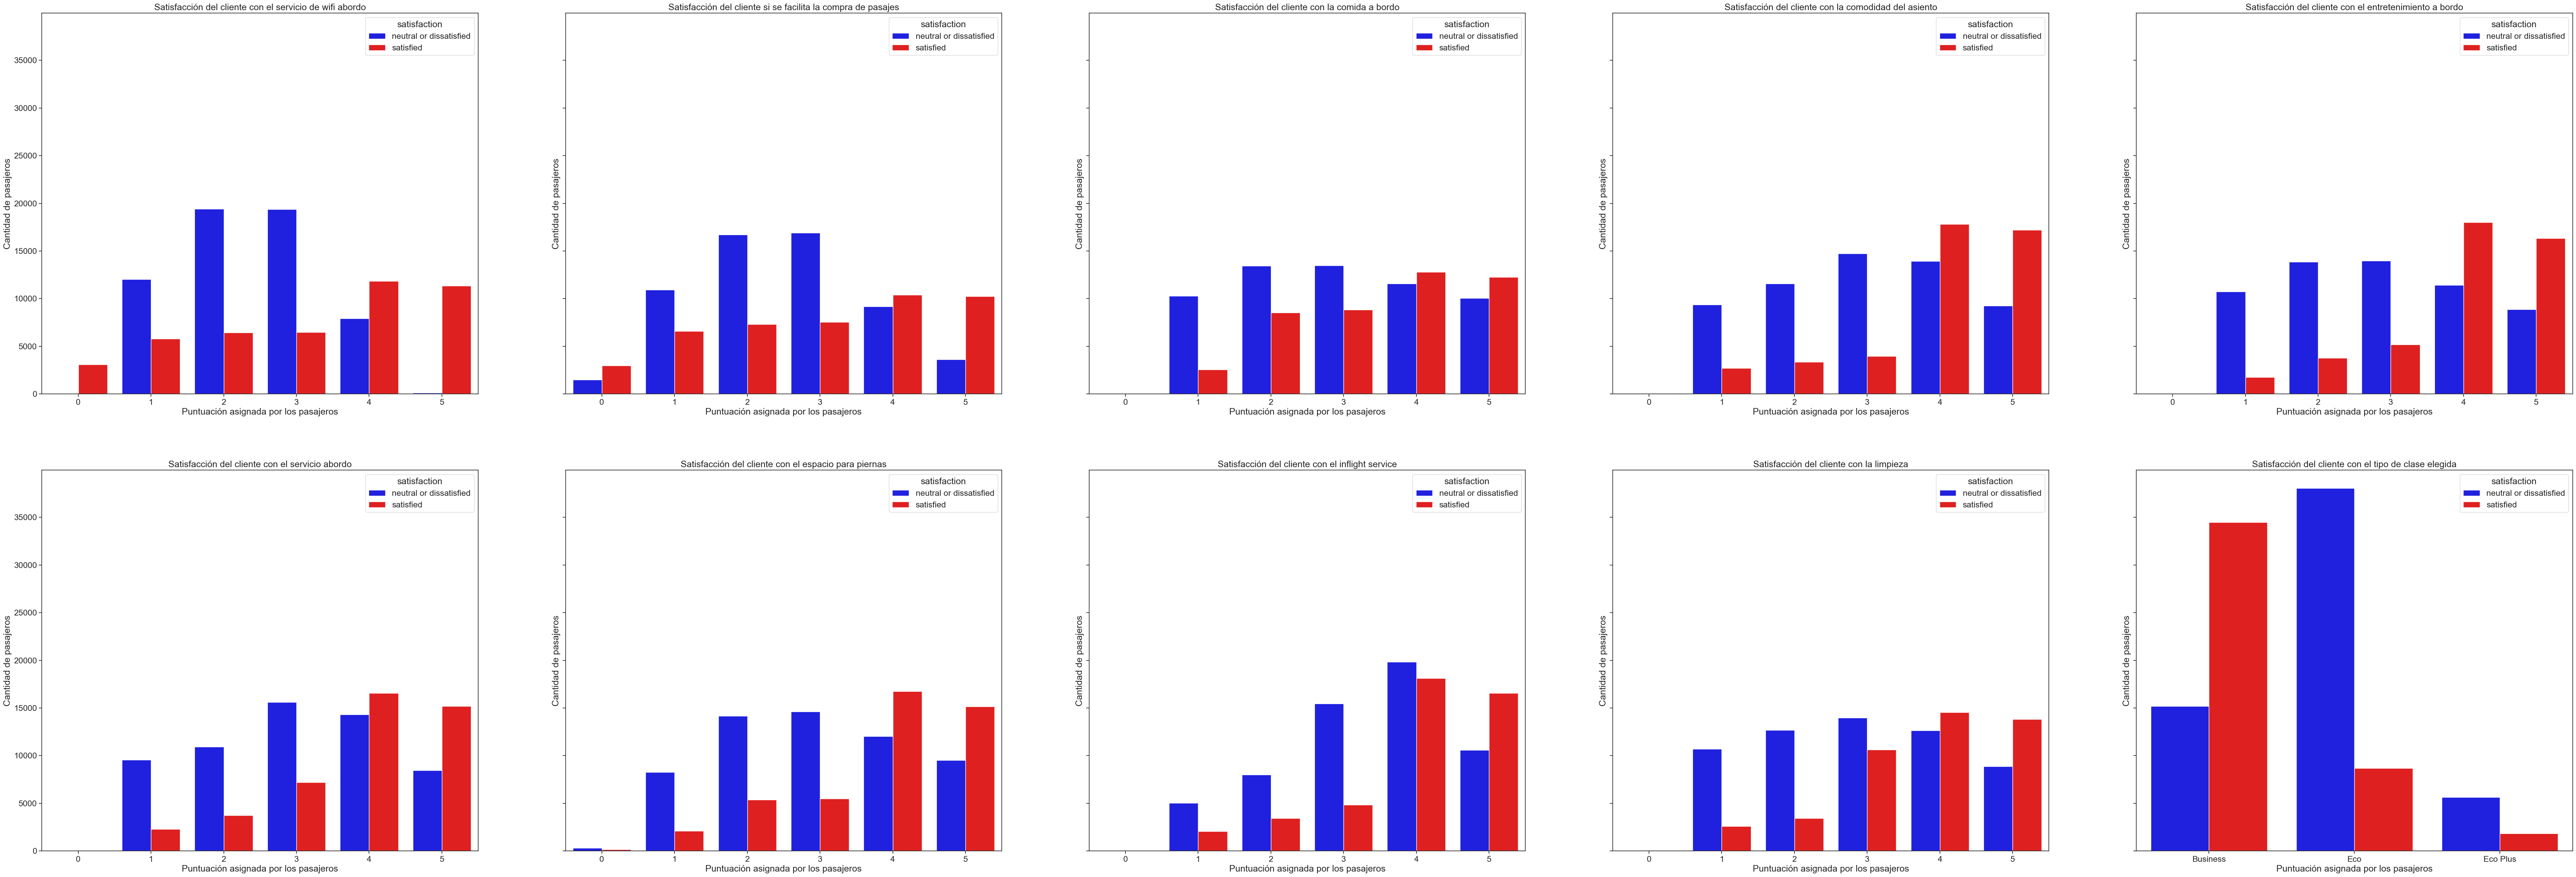

In [80]:
# Este código crea una matriz de subgráficos de 2 filas y 5 columnas, con cada subgráfico mostrando un conteo de la satisfacción del 
# cliente para una característica específica del servicio de la aerolínea. Se utiliza un esquema de color diferente para representar la 
# satisfacción positiva (azul) y negativa (roja). Cada subgráfico tiene su propio título que describe la característica del servicio.

fig, axs = plt.subplots(2, 5, figsize = (90, 30), sharey = True)
colors = ['blue', 'red']
for variable, titulo, ax in zip(['Inflight wifi service','Ease of Online booking','Food and drink','Seat comfort','Inflight entertainment','On-board service','Leg room service','Inflight service','Cleanliness','Class'],
                                ['con el servicio de wifi abordo','si se facilita la compra de pasajes','con la comida a bordo','con la comodidad del asiento','con el entretenimiento a bordo','con el servicio abordo','con el espacio para piernas','con el inflight service','con la limpieza', 'con el tipo de clase elegida'], axs.flat):
    # Gráfico
    sns.countplot(x = df[variable], hue = df['satisfaction'], ax = ax, palette = colors)
    ax.set_title(f'Satisfacción del cliente ' + titulo)
    ax.set(xlabel = 'Puntuación asignada por los pasajeros', ylabel = 'Cantidad de pasajeros')


## Ánalisis de los gráficos

Por lo que muestran los gráficos, parece que la tendencia general apunta hacia cierta insatisfacción con los servicios proporcionados. La mayoría de los pasajeros optaron por respuestas neutras o insatisfechas. Sin embargo, también se observa una concentración de pasajeros satisfechos en los puntajes más altos de los diferentes servicios ofrecidos.

## Conclusiones generales de lo analizado
Después de examinar detenidamente el dataset, se observa un equilibrio generalizado en los datos. La proporción de pasajeros masculinos y femeninos es casi idéntica, con una ligera ventaja para las mujeres (aproximadamente un 1,4% más). En cuanto a las preferencias de clase de asiento, la Business Class es la más popular, seguida de la Economy Class, mientras que la Economy Plus es la menos elegida.

Además, se observa que la mayoría de los pasajeros que eligen la clase Business suelen viajar por motivos de negocios, mientras que aquellos que optan por la clase Economy tienden a hacerlo por placer. Sin embargo, la diferencia en la cantidad de pasajeros entre los viajes de negocios y de placer no es significativa.

En relación a la edad de los pasajeros, se encuentra que la mediana se sitúa alrededor de los 40 años tanto para hombres como para mujeres.

Por último, el análisis revela una proporción considerable de pasajeros insatisfechos con los servicios proporcionados por la aerolínea. Los aspectos peor valorados incluyen el servicio de wifi, la facilidad de compra de pasajes y el espacio para las piernas.

## Recomendaciones en base a lo observado
Basándonos en los datos obtenidos del conjunto de datos, se sugiere realizar una actualización integral de los servicios ofrecidos por la compañía aérea. Esto incluiría mejoras significativas en áreas críticas como el servicio de wifi, la plataforma de compra de boletos y el espacio para las piernas en los asientos.

Además, dado que se observa una cantidad considerable de pasajeros que viajan por motivos de negocios, se recomienda dirigir esfuerzos y campañas publicitarias específicamente a este grupo demográfico. Dado que estos pasajeros suelen optar por las clases más caras de la aerolínea, como la Business Class, mejorar los servicios dirigidos a este segmento podría tener un impacto significativo en los ingresos de la empresa.

# **Feature selection**
El objetivo consiste en depurar los datos, eliminando aquellos campos que no aportan información relevante para la predicción. De esta manera, se busca organizar los datos de manera óptima para evitar que el modelo reciba información redundante o poco útil, lo que podría afectar la calidad y confiabilidad de las predicciones.

# Codificación de variables categóricas

Para poder realizar el análisis y construir modelos predictivos, es necesario convertir las variables categóricas en códigos numéricos. Este proceso nos permitirá luego realizar la matriz de correlación y trabajar con los datos de manera más eficiente.

En primer lugar, se procederá a codificar las variables categóricas. Para el género, se asignará el código 0 para 'Masculino' y 1 para 'Femenino'. Este mismo procedimiento se aplicará al tipo de viaje, clase elegida, tipo de cliente y la variable objetivo (satisfacción del pasajero).

In [81]:
# Este código reemplaza los valores categóricos en el DataFrame con valores numéricos. Se crea un diccionario para cada columna 
# categórica, donde se mapean los valores originales a valores numéricos. Luego, se utiliza el método replace() de pandas para aplicar 
# estos mapeos a las columnas correspondientes en el DataFrame.

dict_gen = {'Male' : 0, 'Female' : 1}
df['Gender'] = df.Gender.replace(dict_gen)

dict_viaje={'Personal Travel' : 0,'Business travel':1}
df['Type of Travel'] = df['Type of Travel'].replace(dict_viaje)

dict_clase={'Eco':0,'Eco Plus':1,'Business':2}
df['Class'] = df.Class.replace(dict_clase)

dict_tipo={'disloyal Customer':0,'Loyal Customer':1}
df['Customer Type'] = df['Customer Type'].replace(dict_tipo)

dict_satisfaccionv2={'neutral o no satisfecho':0,'satisfecho':1}
df['satisfaction'] = df.satisfaction.replace(dict_satisfaccionv2)

# Visualización de la matriz de correlación

Con el fin de obtener una comprensión clara de las relaciones entre las variables, vamos a crear un mapa de calor (heatmap) que represente visualmente los valores de correlación. Este heatmap nos permitirá evaluar tanto la fuerza como la dirección de las relaciones entre las variables, ayudándonos a identificar patrones y posibles asociaciones en nuestros datos.

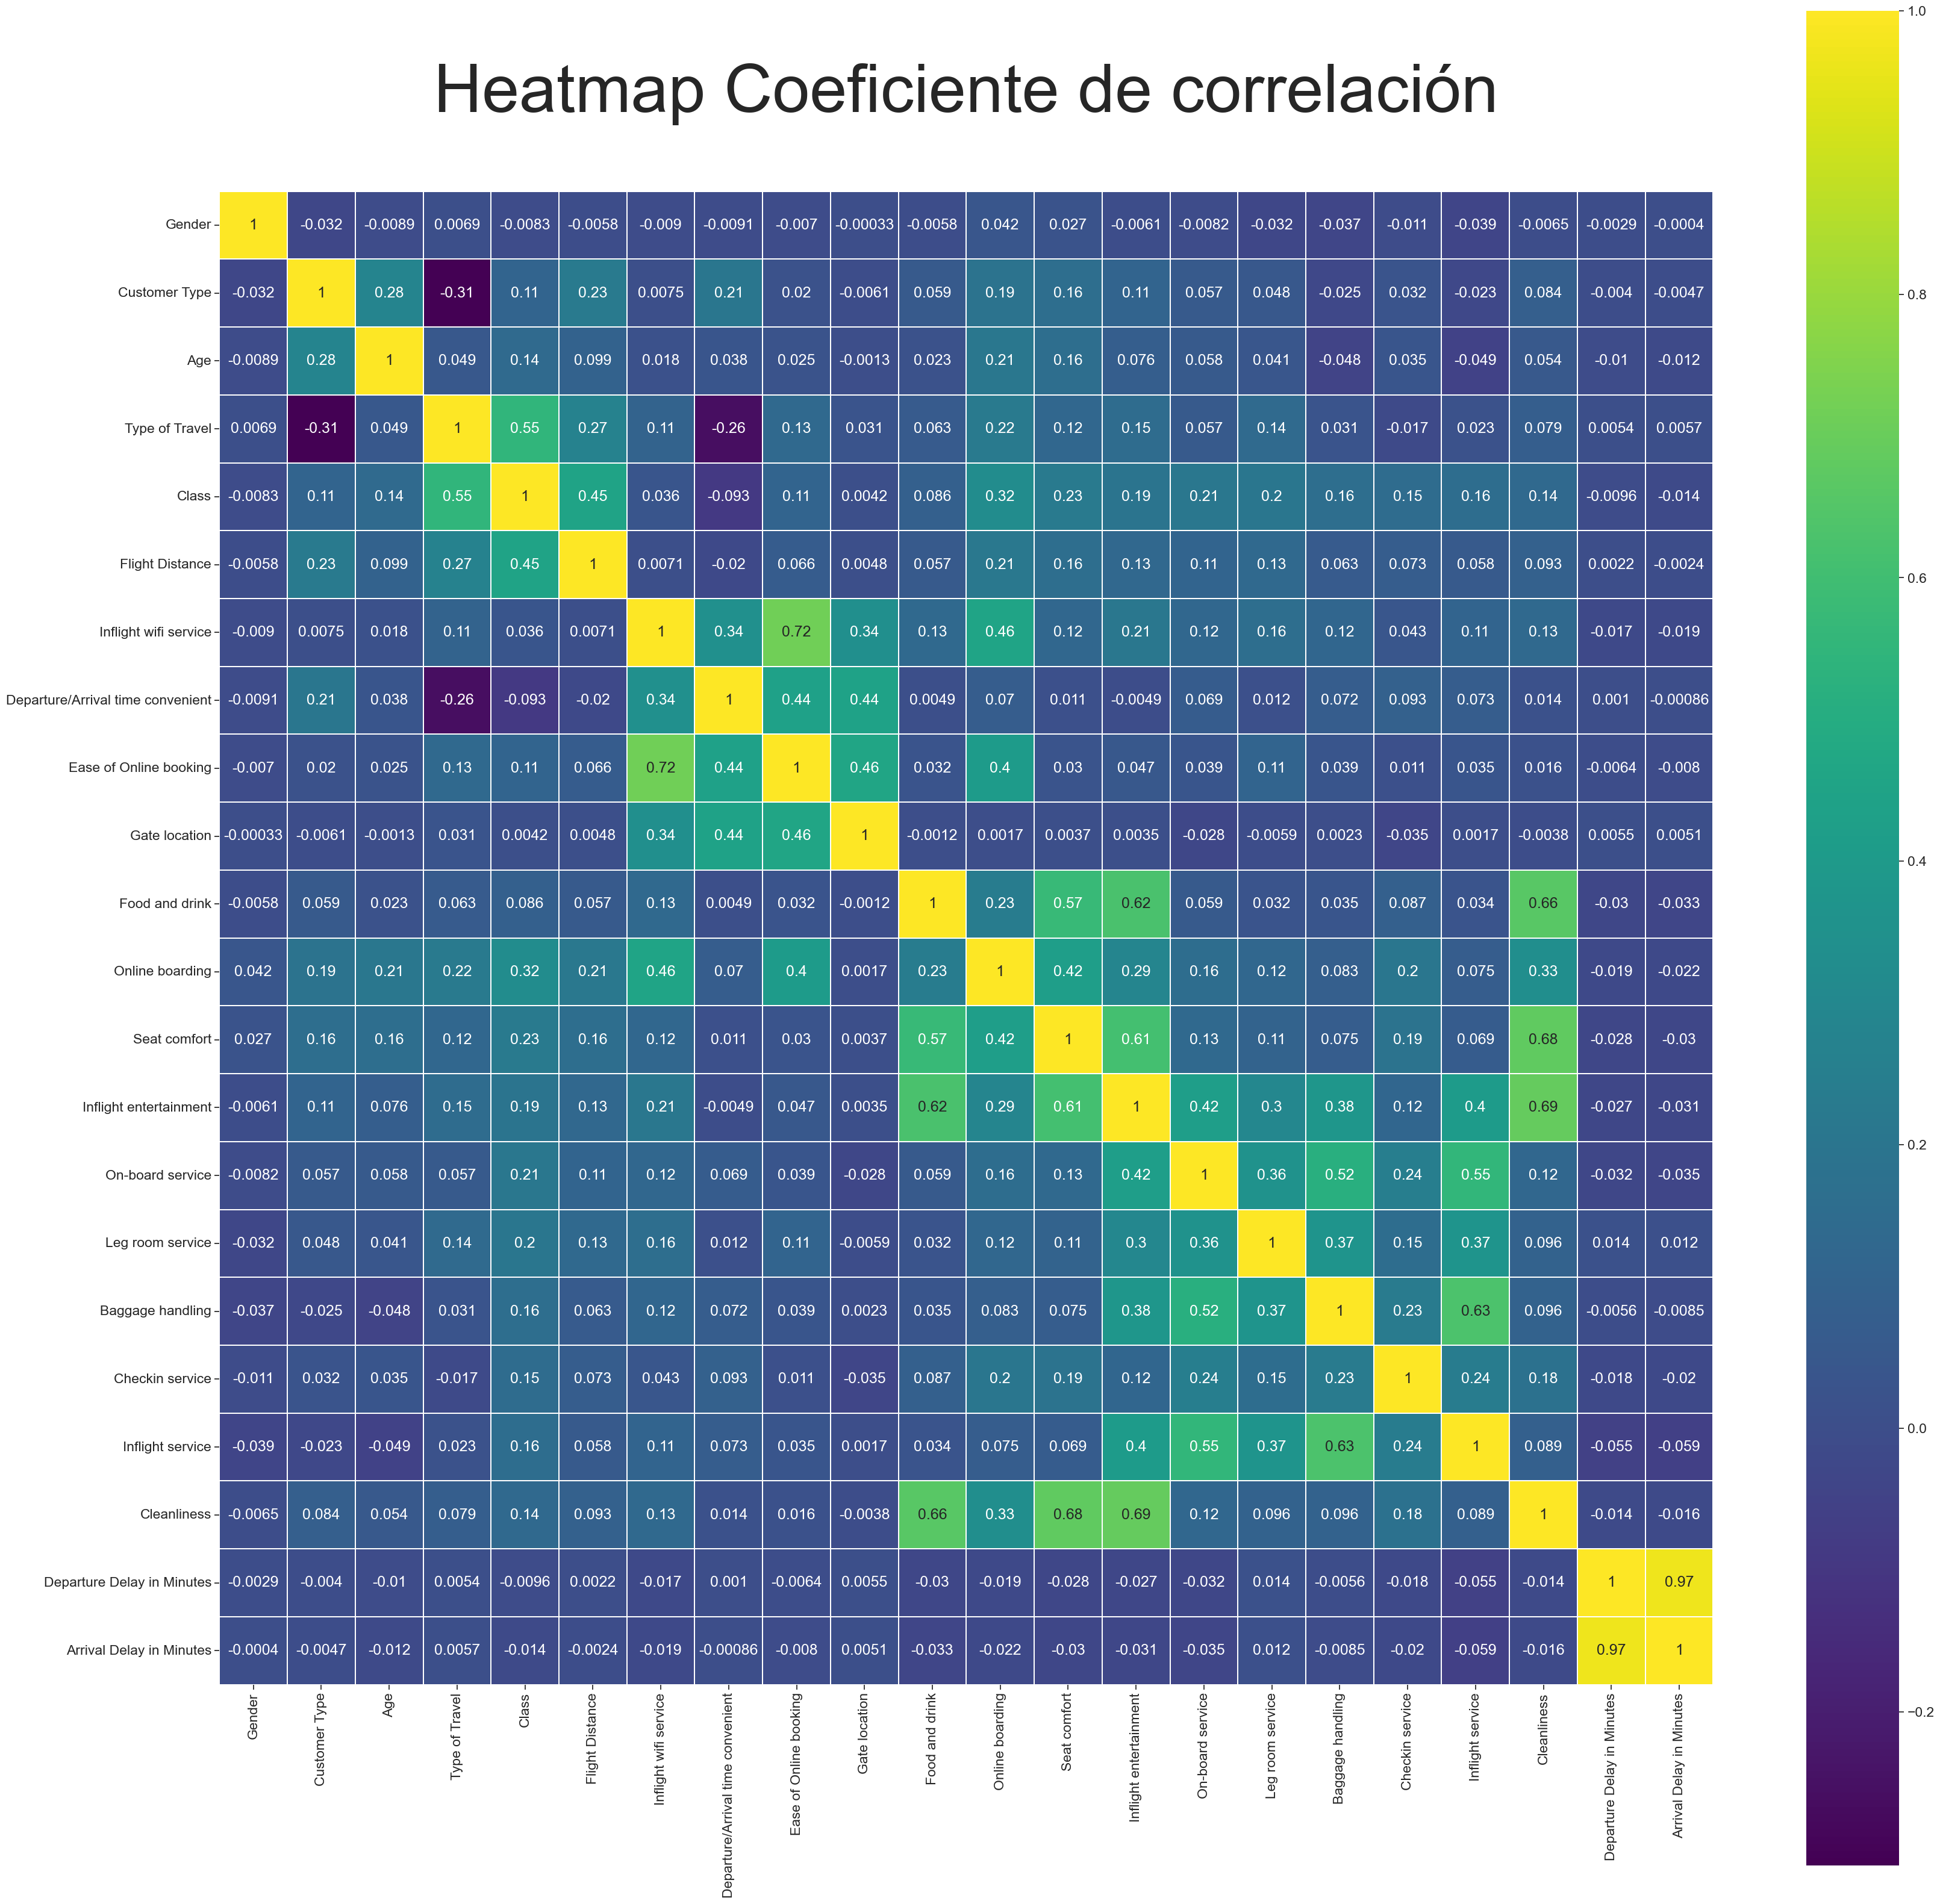

In [82]:
# Este código genera un heatmap que muestra los coeficientes de correlación entre las diferentes variables del DataFrame df. 
# Primero, se crea una copia del DataFrame df llamada dfaux, donde se elimina la columna 'satisfaction' utilizando el método drop(). 
# Luego, se utiliza sns.heatmap() de seaborn para trazar el heatmap de los coeficientes de correlación entre las variables restantes 
# en dfaux. Los coeficientes de correlación se calculan utilizando el método corr() de pandas. 

df_auxiliar=df.drop(['satisfaction'],axis=1)
mapacoef = plt.cm.viridis

plt.figure(figsize=(40,40))
plt.title('Heatmap Coeficiente de correlación', y=1.05, size=80)
sns.heatmap(df_auxiliar.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=mapacoef, linecolor='white', annot=True)

plt.show()

Teniendo en cuenta la alta correlacion existente entre el retraso de la salida y el retraso de la llegada se graficará con el fin de ver si es posible eliminar una de ambas en el feature selection

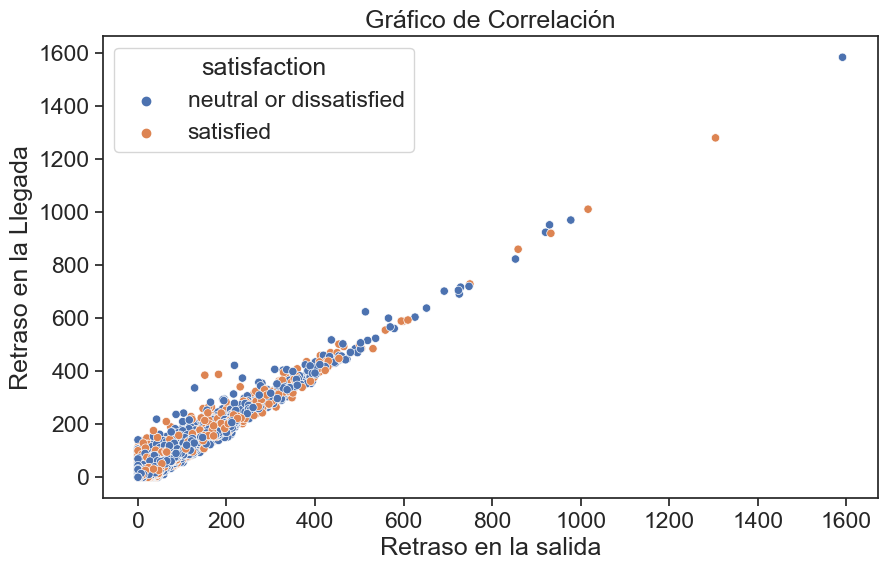

In [83]:
# Este código crea un gráfico de dispersión (scatter plot) que muestra la relación entre el retraso en la salida (en el eje x) y el 
# retraso en la llegada (en el eje y) utilizando los datos del DataFrame df. 

plt.subplots(figsize = (10, 6))

scatter_retraso = sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = df, hue='satisfaction')
scatter_retraso.set(xlabel = 'Retraso en la salida', ylabel = 'Retraso en la Llegada', title = 'Gráfico de Correlación')

plt.show()

## Conclusion 
El análisis revela una fuerte correlación entre el retraso en la salida y el retraso en la llegada. Por lo tanto, podemos concluir que, debido a esta alta correlación, prescindir de una de estas variables sería adecuado durante la selección de características relevantes. En este caso, optaré por descartar el retraso en la salida.

Otras variables que muestran una correlación significativa, alrededor de 0.7, incluyen Inflight wifi service y Ease of Online booking, Cleanliness y Inflight entertainm, Cleanliness y Seat comfort, y Food and drink y Cleanliness. Realizaré un análisis similar para determinar si alguna de estas variables puede ser eliminada durante la etapa de selección de características relevantes.

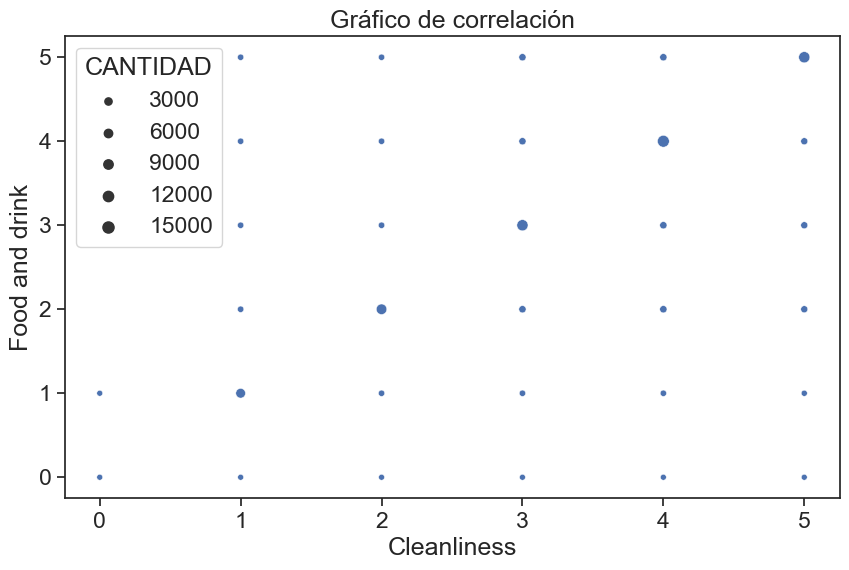

In [84]:
# Este código crea un gráfico de dispersión (scatter plot) donde se visualiza la relación entre dos variables: "Cleanliness" (limpieza) 
# en el eje x y "Food and drink" (comida y bebida) en el eje y.

plt.subplots(figsize=(10, 6))

# El DataFrame aux_burbuja se utiliza para calcular el recuento de observaciones para cada combinación de valores y luego se pasa al 
# gráfico de dispersión
aux_burbuja = df.reset_index().groupby(['Cleanliness', 'Food and drink'])['index'].count().to_frame('CANTIDAD').reset_index()
scatter = sns.scatterplot(x='Cleanliness', y='Food and drink', size='CANTIDAD', data=aux_burbuja)
scatter.set_title('Gráfico de correlación')
plt.show()



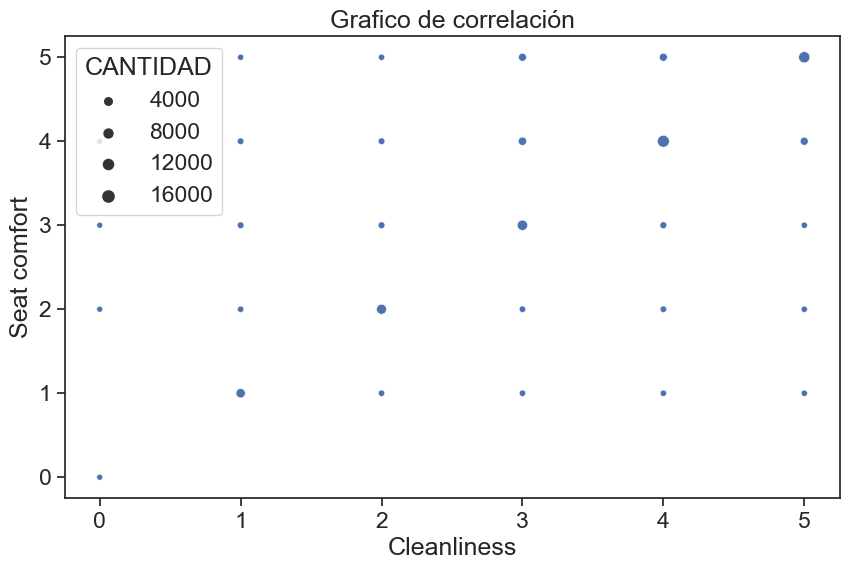

In [85]:
plt.subplots(figsize=(10, 6))

aux_burbuja = df.reset_index().groupby(['Cleanliness', 'Seat comfort'])['index'].count().to_frame('CANTIDAD').reset_index()
scater = sns.scatterplot(x = 'Cleanliness', y = 'Seat comfort', size = 'CANTIDAD', data = aux_burbuja)
scater.set(xlabel = 'Cleanliness', ylabel = 'Seat comfort', title = 'Grafico de correlación')
plt.show()

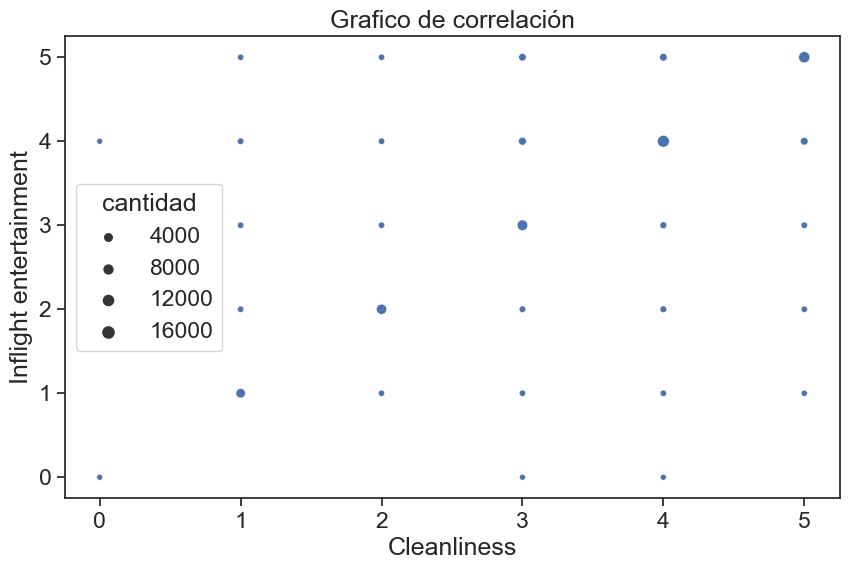

In [86]:
plt.subplots(figsize=(10, 6))
aux_burbuja = df.reset_index().groupby(['Cleanliness', 'Inflight entertainment'])['index'].count().to_frame('cantidad').reset_index()
scater = sns.scatterplot(x = 'Cleanliness', y = 'Inflight entertainment', size = 'cantidad', data = aux_burbuja)
scater.set(xlabel = 'Cleanliness', ylabel = 'Inflight entertainment', title = 'Grafico de correlación')
plt.show()

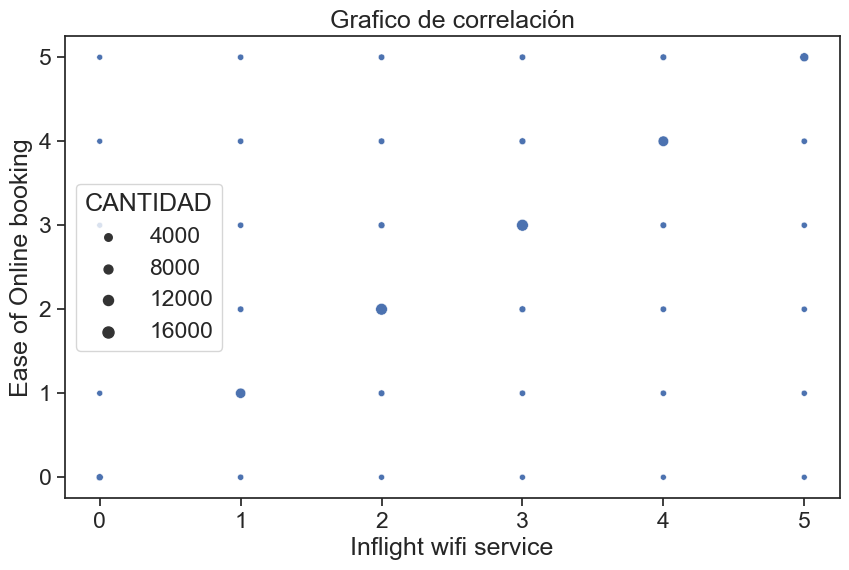

In [87]:
plt.subplots(figsize = (10, 6))
aux_burbuja = df.reset_index().groupby(['Inflight wifi service','Ease of Online booking'])['index'].count().to_frame('CANTIDAD').reset_index()
scater=sns.scatterplot(x = 'Inflight wifi service', y = 'Ease of Online booking', size = 'CANTIDAD', data = aux_burbuja)
scater.set(xlabel = 'Inflight wifi service', ylabel = 'Ease of Online booking', title = 'Grafico de correlación')
plt.show()

## Conclusion
En estos cuatro casos, la correlación es evidente ya que al aumentar una variable, la otra también tiende a aumentar, como se puede observar en el tamaño de las burbujas en el gráfico. Por lo tanto, en la etapa de selección de características, eliminaré la variable 'Cleanliness' en los tres primeros casos y 'Inflight wifi service' en el último.

In [88]:
# Calcular el coeficiente de correlación entre X e Y
corr_coeff =df['Departure Delay in Minutes'].corr(df['Arrival Delay in Minutes'], method='pearson')

# Imprimir el coeficiente de correlación

print("Coeficiente de correlación de Pearson: ", corr_coeff)

Coeficiente de correlación de Pearson:  0.9654809013755736


## Seleccion de Feautures relevantes

Para enfocar correctamente el análisis, se seleccionaron todas las características (features) relevantes, excluyendo aquellas que no aportan valor, como género y puerta_embarque. Se dio mayor importancia a las columnas que presentan una cierta correlación, ya que se espera que estas ayuden a realizar un mejor análisis. Análisis previos indican que las personas que valoran positivamente el servicio prestado tienden a estar más satisfechas, mientras que aquellas que dan valoraciones menos positivas suelen estar más disconformes con el servicio.

Es importante señalar que variables como retraso_salida, horario, limpieza y wifi_abordo fueron excluidas debido a la alta correlación con otras variables. La razón detrás de esta exclusión es que estas variables redundantes pueden reducir la capacidad de generalización del modelo y afectar negativamente su precisión.

Por lo tanto, se eligió la variable de satisfacción como la variable objetivo (target), que será la Y en nuestro análisis.

In [89]:
# genero un nuevo dataframe con los features relevantes y la variable target
analisis = pd.DataFrame()

analisis['Customer Type'] = df['Customer Type']
analisis['Age'] = df['Age']
analisis['Type of Travel'] = df['Type of Travel']
analisis['Class'] = df['Class']
analisis['Flight Distance'] = df['Flight Distance']
analisis['Ease of Online booking'] = df['Ease of Online booking']
analisis['Food and drink'] = df['Food and drink']
analisis['Online boarding'] = df['Online boarding']
analisis['Seat comfort'] = df['Seat comfort']
analisis['Inflight entertainment'] = df['Inflight entertainment']
analisis['On-board service'] = df['On-board service']
analisis['Leg room service'] = df['Leg room service']
analisis['Baggage handling'] = df['Baggage handling']
analisis['Checkin service'] = df['Checkin service']
analisis['Inflight service'] = df['Inflight service']
analisis['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes']
analisis['satisfaction'] = df['satisfaction']
analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Customer Type             103904 non-null  category
 1   Age                       103904 non-null  int64   
 2   Type of Travel            103904 non-null  category
 3   Class                     103904 non-null  category
 4   Flight Distance           103904 non-null  int64   
 5   Ease of Online booking    103904 non-null  int64   
 6   Food and drink            103904 non-null  int64   
 7   Online boarding           103904 non-null  int64   
 8   Seat comfort              103904 non-null  int64   
 9   Inflight entertainment    103904 non-null  int64   
 10  On-board service          103904 non-null  int64   
 11  Leg room service          103904 non-null  int64   
 12  Baggage handling          103904 non-null  int64   
 13  Checkin service           103

In [90]:
#Se selecciona la variable target
x = analisis.drop(['satisfaction'],axis=1)
y = analisis['satisfaction']

In [91]:
x.shape

(103904, 16)

In [92]:
#Imports necesarios
from sklearn.model_selection import train_test_split


Para construir y evaluar el modelo de análisis, los datos se dividirán en conjuntos de entrenamiento y prueba (tanto X como Y). La proporción elegida es del 70% para entrenamiento y el 30% para prueba. Esta división asegura que el modelo tenga suficiente información para aprender y también permite evaluar su desempeño en datos no vistos.

Además, para mantener la proporción original de las respuestas de satisfacción en ambos conjuntos (entrenamiento y prueba), utilizaremos la técnica de estratificación (stratify). La estratificación garantiza que la distribución de la variable objetivo (en este caso, la satisfacción) sea similar en ambos conjuntos, evitando sesgos que podrían afectar la validez de los resultados.

También se empleará el parámetro random_state. Esto establece una semilla para el generador de números aleatorios, lo que asegura que la división de los datos sea reproducible. Es decir, al usar el mismo random_state, obtendremos la misma división cada vez que ejecutemos el proceso, permitiendo replicar los resultados.

In [93]:

rng = np.random.RandomState(60)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=rng,stratify=y) 

El código crea un SimpleImputer para reemplazar los valores faltantes con la media de cada columna. Primero, ajusta el imputer al conjunto de entrenamiento (X_train) y transforma los datos, reemplazando los valores faltantes con las medias correspondientes. Luego, aplica esta transformación al conjunto de prueba (X_test), utilizando las medias calculadas del conjunto de entrenamiento. Esto garantiza una imputación consistente y evita sesgos introducidos por el conjunto de prueba. Los resultados son X_train_imputed y X_test_imputed, donde los valores faltantes han sido reemplazados por las medias.

In [95]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

## Estandarizacion
Estandarización de características: Al escalar las características, buscamos normalizar los datos para que todas las características contribuyan de manera equitativa al modelo. Esto es especialmente útil para algoritmos sensibles a las escalas de las características.
Mejorar el rendimiento del modelo: Para modelos como KNN, que se basan en la distancia entre puntos de datos, la estandarización puede mejorar significativamente el rendimiento, ya que las características con diferentes escalas pueden sesgar las distancias.
Consistencia: Aseguramos que tanto los datos de entrenamiento como los de prueba estén en la misma escala, lo que permite que el modelo generalice mejor y se eviten posibles problemas de rendimiento debidos a diferencias en las escalas de los datos.

In [96]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Modelos:

# 1) SVM
El propósito del modelo SVM en este contexto es clasificar a los clientes de la aerolínea en categorías de satisfechos e insatisfechos basándose en diversas características (por ejemplo, calidad del servicio, puntualidad, comodidad, etc.). El modelo encuentra el hiperplano que mejor separa estas dos clases, maximizando la distancia (margen) entre los puntos de datos más cercanos de cada clase.
El SVM es especialmente efectivo cuando el número de dimensiones (características) es mayor que el número de muestras.
Versatilidad: Utiliza diferentes funciones de kernel (lineal, polinómico, RBF, etc.) para crear fronteras de decisión no lineales.
Robustez: Es menos propenso a sobreajustarse cuando se utiliza correctamente, gracias al margen máximo que crea entre las clases.
Eficiencia Computacional: Puede ser ineficiente en términos de tiempo y memoria cuando se trabaja con grandes conjuntos de datos.
Ajuste de Hiperparámetros: Requiere un ajuste cuidadoso de los hiperparámetros, como el parámetro de penalización C y los parámetros del kernel.

In [97]:
svm=SVC()
svm.fit(X_train_scaled,y_train)
acc=svm.score(X_test_scaled, y_test)

In [98]:
print('accuracy =', round(acc * 100, 2), '%')

accuracy = 92.9 %


Conclusión
El modelo SVM entrenado en este proyecto proporciona una herramienta poderosa para clasificar la satisfacción del cliente de una aerolínea. La precisión obtenida, con un accuracy del 92.9%, refleja su capacidad para generalizar en datos de prueba. Esto hace del SVM una opción robusta y confiable para problemas de clasificación en el dominio de análisis de satisfacción del cliente
El alto grado de precisión del modelo indica que el SVM ha logrado identificar correctamente la mayoría de los casos de satisfacción e insatisfacción del cliente basándose en las características proporcionadas. Esto es crucial para la aerolínea, ya que permite tomar decisiones informadas y desarrollar estrategias que mejoren la experiencia del cliente y, en última instancia, aumenten su satisfacción.

# 2) KNN
implementamos el algoritmo K-Nearest Neighbors (KNN)

In [99]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

In [100]:
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 91.38%


Conclusión
El modelo KNN con k=5 ha sido entrenado para clasificar la satisfacción del cliente de una aerolínea. La precisión obtenida en los datos de prueba es del 92.9%. Esto indica que el modelo es capaz de clasificar correctamente la mayoría de los casos de satisfacción e insatisfacción del cliente.
El alto grado de precisión del modelo KNN sugiere que este enfoque es efectivo para este tipo de problema de clasificación. El KNN es especialmente útil en situaciones donde las relaciones entre las características y las clases no son lineales y se basan en la proximidad de las observaciones en el espacio de características.

# 3) Regresion Logistica


In [101]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
accuracy = logreg.score(X_test_scaled, y_test)

In [102]:
print('Accuracy =', round(accuracy * 100, 2), '%')

Accuracy = 86.94 %


# 4) Random Forest Classifier
El Random Forest es un algoritmo de aprendizaje automático que utiliza múltiples árboles de decisión para mejorar la precisión y controlar el sobreajuste. Cada árbol es entrenado con una muestra aleatoria del conjunto de datos, y la predicción final se obtiene promediando las predicciones de todos los árboles.
Ventajas del Random Forest
Precisión: Su capacidad para mejorar la precisión sobre modelos individuales (como árboles de decisión).
Robustez: Menos susceptible al sobreajuste en comparación con un solo árbol de decisión.
Versatilidad: Puede manejar tanto clasificación como regresión.
Manejo de la Multicolinealidad: Capaz de manejar relaciones complejas y multicolinealidad entre características.
Limitaciones del Random Forest
Complejidad: Puede ser menos interpretable que modelos más simples.
Requiere más recursos: Mayor tiempo de computación y memoria debido a la construcción de múltiples árboles.

In [103]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
accuracy = rfc.score(X_test_scaled, y_test)
print('accuracy =', round(accuracy * 100, 2), '%')

accuracy = 93.82 %


El modelo Random Forest entrenado en este proyecto proporciona una herramienta poderosa para clasificar la satisfacción del cliente de una aerolínea. La precisión del 
93.85% refleja una excelente capacidad del modelo para generalizar en datos de prueba, haciéndolo una opción robusta y confiable para problemas de clasificación en el dominio de análisis de satisfacción del cliente.

# CONCLUSION
En este análisis, hemos implementado y evaluado varios modelos de clasificación para determinar la satisfacción del cliente de una aerolínea. Los modelos utilizados incluyen SVM (Support Vector Machine), KNN (K-Nearest Neighbors), Regresión Logística y Random Forest. Cada modelo fue entrenado y probado con los mismos datos, y se evaluaron sus precisiones para comparar su desempeño.

SVM (Support Vector Machine)
El modelo SVM alcanzó una precisión del 92.9%, demostrando su capacidad para clasificar correctamente la satisfacción del cliente. SVM es especialmente útil para problemas de clasificación con datos de alta dimensionalidad y relaciones no lineales entre características.

KNN (K-Nearest Neighbors)
El modelo KNN con k=5 obtuvo una precisión del 91.38%. Este modelo es intuitivo y fácil de implementar, y funciona bien cuando la relación entre las características y las clases es compleja y no lineal. Sin embargo, puede ser computacionalmente costoso para grandes conjuntos de datos.

Regresión Logística
El modelo de Regresión Logística logró una precisión del 86.94%. Aunque esta precisión es ligeramente inferior a la de los otros modelos, la Regresión Logística ofrece ventajas significativas en términos de interpretabilidad y eficiencia. Es útil para entender la relación entre las variables independientes y la probabilidad de satisfacción del cliente.

Random Forest
El modelo Random Forest alcanzó la mayor precisión, con un 93.85%. Random Forest combina la predicción de múltiples árboles de decisión, lo que mejora la precisión y reduce el riesgo de sobreajuste. Es robusto y capaz de manejar relaciones complejas y multicolinealidad entre características.

Comparación y Selección del Modelo
Precisión: El modelo Random Forest mostró la mayor precisión, seguido por SVM y KNN, con la Regresión Logística ligeramente detrás.
Robustez y Manejo de la Complejidad: Random Forest y SVM son más robustos frente a datos complejos y de alta dimensionalidad, mientras que KNN es simple pero puede ser computacionalmente intensivo. La Regresión Logística, aunque menos precisa en este caso, proporciona una buena interpretabilidad.
Interpretabilidad: La Regresión Logística es la más fácil de interpretar, seguida por KNN. SVM y Random Forest son más complejos y menos interpretables.

### Conclusión
En conclusión, cada modelo tiene sus propias ventajas y limitaciones. Para este análisis específico de la satisfacción del cliente en una aerolínea, el modelo Random Forest se destaca por su alta precisión y robustez. No obstante, la selección del modelo puede depender de otros factores, como la necesidad de interpretabilidad, los recursos computacionales disponibles y la naturaleza del problema específico.

Para una solución integral, se recomienda considerar una combinación de estos modelos o utilizar técnicas de ensamblaje para aprovechar las fortalezas de cada uno. Esto permite una clasificación más precisa y robusta, proporcionando a la aerolínea una herramienta poderosa para mejorar la satisfacción del cliente y tomar decisiones basadas en datos.